In [34]:
import numpy as np
from scipy.special import softmax
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [350]:
class multiclass(object): 
    def __init__(self):
        self.W = None
        self.b = 0
        
    def load_data(self):
        with open('spiral_train.dat','r') as f:
            return np.array([i.strip().split(',') for i in f.readlines()], dtype=float)      
        
    def hypothesis(self, X):
        f = np.dot(X,self.W) + self.b
        f = np.exp(f)
        denom = f.sum(axis=1)
        for i in range(len(denom)):
            f[i,:] /= denom[i]
        return f
    
    def loss(self, p, y, lamb=0.5):        
        return -1*(np.sum(y*np.log(p))/len(y)) + (lamb/2) * (np.sum(np.square(self.W)))
        
    def gradient(self, X, Y, step_size=0.8):
        p = self.hypothesis(X)
        J = self.loss(p, Y)
        dj_dw = np.dot(X.T, (p - Y)/len(X)) + (step_size * self.W)
        dj_db = sum(p-Y)/len(X)
        return [dj_dw, dj_db]
    
    def train(self, X, Y, step_size=0.04, epochs=100):
        loss_per_epoch = []
        p = self.hypothesis(X)
        J = self.loss(p, Y)
        for index in range(epochs):            
            if J < 0.1:
                print('loss is minimum i.e.', J)
                break
            delta_a = self.gradient(X, Y)
            self.W -= step_size * delta_a[0]
            self.b -= step_size * delta_a[1]
            J = self.loss(p, Y)
            loss_per_epoch.append(J)

        correct = 0
        total = 0
        for i in range(len(p)):
            if np.argmax(Y[i]) == np.argmax(p[i]):
                correct += 1
            total += 1
        print('accuracy = ', (correct/total)*100)
        %matplotlib inline
        plt.plot(loss_per_epoch)
        plt.title('Losses per epoch')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.show()
    
    def main(self):
        data = self.load_data()
        np.random.shuffle(data)
        X, Y = data[:,:-1], data[:,-1]
        N, D = X.shape
        k = len(np.unique(Y))
        self.W = np.random.normal(scale=1/D**0.5, size=(D,k))
        self.b = np.random.normal(scale=1/k**0.5, size=k)
        print('W:', self.W)
        print('b:', self.b)
        ind = np.zeros((N, k))
        for i in range(N):
            ind[i, int(Y[i])] = 1
        Y = ind
        self.train(X, Y)
#         data = data[data[:,-1].argsort()]
#         return data
        self.plot_data(data)
        
    def plot_data(self, data):
        p = self.hypothesis(data[:,:-1])
#         color = ['r','g','b']
#         regions = [[],[],[]]
#         %matplotlib inline
#         for pt in range(len(p)):
#             plt.scatter(data[pt, 0], data[pt,1], c=color[np.argmax(p[pt])])
#             regions[np.argmax(p[pt])].append(data[pt,:-1])
#         for index,r in enumerate(regions):
#             if len(r) == 0:
#                 continue
#             temp = np.asarray(r)
#             plt.fill_between(temp[:,0], temp[:,1], 0,
#                             facecolor=color[index],
#                             interpolate=True,
#                             alpha=0.5)
        X,Y = data[:,:-1], data[:,-1]
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        h = .02  # step size in the mesh
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        com = np.c_[xx.ravel(), yy.ravel()]
        Z = self.hypothesis(com)
        Z = np.argmax(Z, axis=1)
        Z = Z.reshape(xx.shape)

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.figure(1, figsize=(4, 3))
        plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

        # Plot also the training points
        plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
        
        plt.show()

W: [[ 1.13395259 -0.18132901 -0.88227882]
 [ 0.51842919 -0.11516643 -0.43056516]]
b: [ 0.08036394  0.07812435 -0.17722656]
accuracy =  52.33333333333333


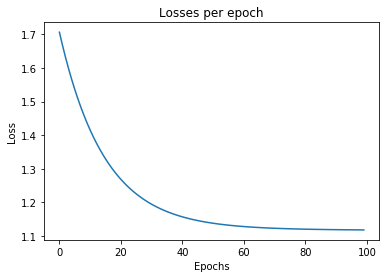

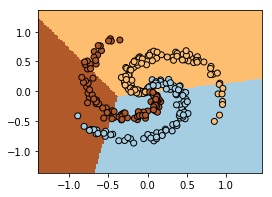

In [355]:
obj = multiclass()
obj.main()